In [4]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, \
Conv2D, MaxPooling2D, Flatten, Activation,UpSampling2D,InputLayer, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.nn import relu, softmax
import matplotlib.pyplot as plt
import numpy as np
tensorflow.config.run_functions_eagerly(True)

In [5]:
def load_from_binary(path_x_train, path_y_train,
                    path_x_test, path_y_test,
                    imsize):
    
    with open(path_x_train, 'rb') as read_binary:
        x_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_train, 'rb') as read_binary:
        y_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_x_test, 'rb') as read_binary:
        x_test = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_test, 'rb') as read_binary:
        y_test = np.fromfile(read_binary, dtype = np.uint8)
    x_train = np.array(x_train, dtype = 'float32') / 255
    x_test = np.array(x_test, dtype = 'float32') / 255
    x_train = x_train.reshape(-1, imsize * imsize)
    x_test = x_test.reshape(-1, imsize * imsize)
    return x_train, y_train, x_test, y_test
def one_plot(loss, val_loss, acc, val_acc):
    fig, ax = plt.subplots(2, 1, figsize=(20,15))
    ax[0].plot(loss, color = 'r', label = 'loss', linestyle = '--')
    ax[0].plot(val_loss, color = 'g', label = 'val_loss')
    ax[1].plot(acc, color = 'r', label = 'acc', linestyle = '--')
    ax[1].plot(val_acc, color = 'g', label = 'val_acc')
    ax[0].set_ylim((min(min(val_loss),min(loss)), 1.5*max(val_loss + loss)))
    ax[1].set_ylim((min(min(val_acc),min(acc)), 1))
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[1].set_xlabel('Epoch')
    ax[0].legend()
    ax[1].legend()

In [6]:
num_classes = 6
img_rows = img_cols = 64
file_image_train = 'data_train.bin'
file_lable_train = 'label_train.bin'
file_image_test = 'data_test.bin'
file_lable_test = 'label_test.bin'
x_train, y_train, x_test, y_test = load_from_binary(file_image_train, file_lable_train,
                                                   file_image_test, file_lable_test, img_rows)

In [7]:
def one_part(units, x):
    x = Dense(units)(x)
    x = LeakyReLU()(x)
    return Dropout(0.25)(x)

In [8]:
latent_size = 32 # Размер латентного пространста
inp = Input(shape = (64*64))
x = one_part(2048, inp)
x = one_part(1024, x)
x = one_part(512, x)
x = one_part(256, x)
x = one_part(128, x)
x = one_part(64, x)
x = Dense(latent_size)(x)
encoded = LeakyReLU()(x)
x = one_part(64, encoded)
x = one_part(128, x)
x = one_part(256, x)
x = one_part(512, x)
x = one_part(1024, x)
x = one_part(2048, x)
decoded = Dense(64*64, activation = 'sigmoid')(x)
model = Model(inputs = inp, outputs = decoded)
model.compile('adam', loss = 'binary_crossentropy') # nadam
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4096)]            0         
                                                                 
 dense (Dense)               (None, 2048)              8390656   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0     

In [ ]:
def some_plts(imgs):
    fig, axs = plt.subplots(4, 4)
    k = -1
    for i in range(4):
        for j in range(4):
            k += 1
            img = imgs[k].reshape(64, 64)
            axs[i, j].imshow(img, cmap = 'gray')
            axs[i, j].axis('off')
    plt.subplots_adjust(wspace = 1, hspace = 0)
    plt.show()

In [ ]:
len_test = len(y_test)
plt_epoch = True
epochs = 10 # Число эпох
for epoch in range(epochs):
    print('epoch:', epoch + 1)
    model.fit(x = x_train, y = x_train)
    # Выводим, если работаем в IPython, Jupyter или Colab
    if plt_epoch and epoch > 0 and epoch % 2 == 0:
        arr_idx = np.random.randint(0, len_test, 16) # class 'numpy.ndarray'
        imgs_for_test = x_test[arr_idx].reshape(16, 64*64) # class 'numpy.ndarray'
        some_plts(imgs_for_test)
        imgs_pedicted = model.predict(imgs_for_test)
        some_plts(imgs_pedicted) # imgs_pedicted.shape = (16, 784)

# Data generation in color

In [9]:
import PIL

In [10]:
colors = {
    'white':(255, 255, 255),
    'red':(255, 0, 0),
    'green':(0, 255, 0),
    'yellow':(255, 255, 0),
    'phiolet':(255, 0, 255),
    'blue':(0, 255, 255),
}

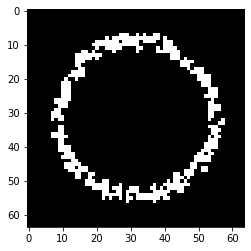

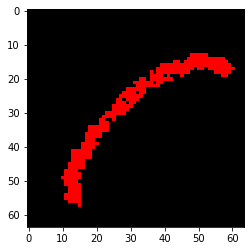

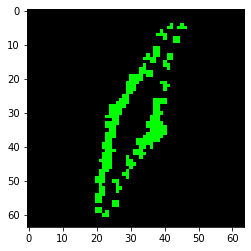

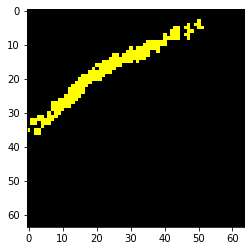

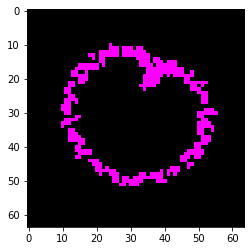

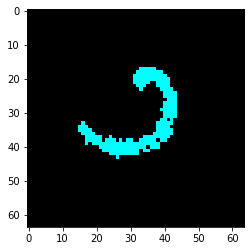

In [11]:
for i, values in enumerate(colors.items()):
    indx = np.flatnonzero(y_train == i)
    new_matrix = np.zeros((64, 64, 3))
    matrix = x_train[indx][0]
    #print(new_matrix[:,:,0])
    for ind, j in enumerate(values[1]):
        if j>0:
            matrix[matrix > 0] = 255
            new_matrix[:,:,ind] = matrix.reshape((64,64))
    image = PIL.Image.fromarray(new_matrix.astype('uint8'), 'RGB')
    fig, ax = plt.subplots(1,1)
    ax.imshow(image)

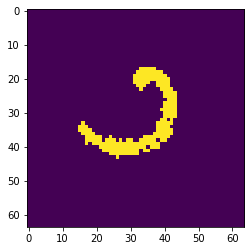

In [12]:
#adapting x_train for model
x_train[x_train > 0] = 0.5
plt.imshow((x_train[0]*255*2).reshape(64,64))

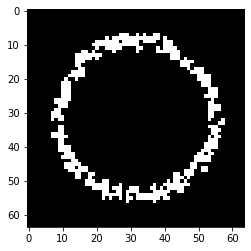

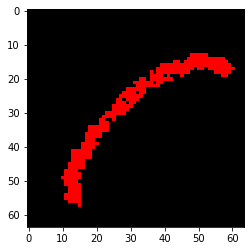

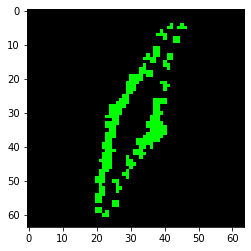

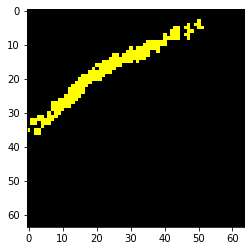

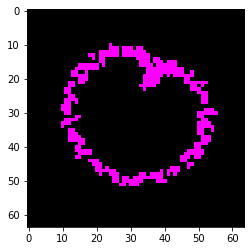

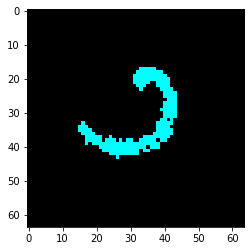

In [13]:
#creating new_matrix array of rgb images
new_matrix = np.zeros((x_train.shape[0], 64, 64, 3))
for i, values in enumerate(colors.items()):
    indx = np.flatnonzero(y_train == i)
    matrix = x_train[indx].reshape((len(indx),64,64))
    for ind, j in enumerate(values[1]):
        if j>0:
            matrix[matrix > 0] = 0.5
            new_matrix[indx,:,:,ind] = matrix
    image = PIL.Image.fromarray((new_matrix[indx[0]]*255*2).astype('uint8'), 'RGB')
    fig, ax = plt.subplots(1,1)
    ax.imshow(image)

In [28]:
latent_size = 128 # Размер латентного пространста
image_shape = (64*64)
result_shape = (64* 64* 3)
encoder = Sequential()
encoder.add(InputLayer(image_shape))
for i in range(12, 7, -1):
    encoder.add(Dense(2**i))
    encoder.add(LeakyReLU(2**i))
    encoder.add(Dropout(0.25))
encoder.add(Dense(latent_size))
# The decoder
decoder = Sequential()
decoder.add(InputLayer((latent_size,)))
for i in range(8, 14, 1):
    decoder.add(Dense(2**i))
    decoder.add(LeakyReLU(2**i))
    decoder.add(Dropout(0.25))
decoder.add(Dense(np.prod(result_shape))) 

inp = Input(image_shape)
code = encoder(inp)
dec = decoder(code)

model = Model(inputs = inp, outputs = dec)
model.compile('adam', loss = 'binary_crossentropy') # nadam
model.summary(expand_nested=True)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4096)]            0         
                                                                 
 sequential_2 (Sequential)   (None, 128)               27959168  
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| dense_13 (Dense)          (None, 4096)              16781312  |
|                                                               |
| leaky_re_lu_11 (LeakyReLU)  (None, 4096)            0         |
|                                                               |
| dropout_11 (Dropout)      (None, 4096)              0         |
|                                                               |
| dense_14 (Dense)          (None, 2048)              8390656   |
|                                                               |
| leaky_re_lu_12 (LeakyReLU)  (None, 2048)            0    

In [29]:
print(new_matrix.shape)

(3600, 64, 64, 3)


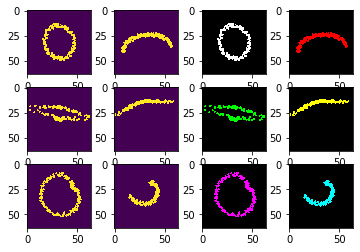

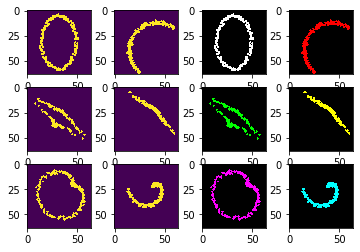

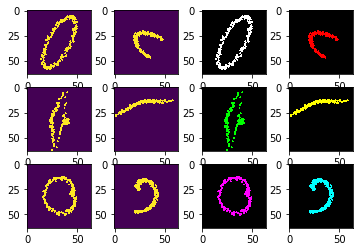

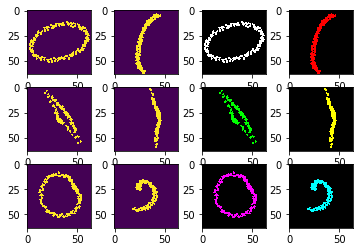

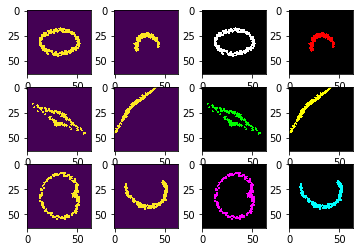

In [50]:
for m in range(5):
    fig, ax = plt.subplots(3,4)
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]-2):
            idxs = np.flatnonzero(y_train == (2*i+j))
                    #print(idxs)
            idxs = np.random.choice(idxs, 1, replace=False)
            ax[i][j].imshow(x_train[idxs].reshape(64,64))
            image = PIL.Image.fromarray((new_matrix[idxs][0]*255*2).astype('uint8'), 'RGB')
            ax[i][j+2].imshow(image)

In [33]:
%matplotlib inline
len_test = len(y_train)
plt_epoch = True
epochs = 10 # Число эпох
new_matrix = new_matrix.reshape((3600, 64*64*3))
for epoch in range(epochs):
    print('epoch:', epoch + 1)
    model.fit(x = x_train, y = new_matrix, batch_size=128)
    #plt.imshow(x_train[0].reshape(64,64)*255)
    # Выводим, если работаем в IPython, Jupyter или Colab
    #if plt_epoch and epoch > 0 and epoch % 2 == 0:
    fig, ax = plt.subplots(3,4)
    grapics = 0
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]-2):
            idxs = np.flatnonzero(y_train == grapics)
                #print(idxs)
            idxs = np.random.choice(idxs, 1, replace=False)
                #print(idxs)
            imgs_for_test = x_train[idxs]
                #print(imgs_for_test.shape)
            img_pred = model.predict(imgs_for_test)
                #print(imgs_for_test.shape)
            img_pred = PIL.Image.fromarray((img_pred*255*2).reshape(64,64,3).astype('uint8'), 'RGB')
            ax[i][j].imshow(img_pred)
            ax[i][j+2].imshow(imgs_for_test.reshape(64,64), cmap='gray')
            grapics+=1

epoch: 1


C:\Users\Windows\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


14/29 [=============>................] - ETA: 19s - loss: 7.6752

KeyboardInterrupt: 

<PIL.Image.Image image mode=RGB size=64x64 at 0x2085CDEDCA0>


In [ ]:
model.save("simple_autoencoder.model")

In [14]:
latent_size = 512 # Размер латентного пространста
inp = Input(shape = (64*64))
x = one_part(4096, inp)
for i in range(12, 9, -1):
    x = one_part(2**i, x)
x = Dense(latent_size)(x)
encoded = LeakyReLU()(x)
for i in range(9, 14, 1):
    x = one_part(2**i, x)
decoded = Dense(64*64*3, activation = 'sigmoid')(x)
model = Model(inputs = inp, outputs = decoded)
model.compile('adam', loss = 'binary_crossentropy') # nadam
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4096)]            0         
                                                                 
 dense_14 (Dense)            (None, 4096)              16781312  
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 4096)              0         
                                                                 
 dropout_12 (Dropout)        (None, 4096)              0         
                                                                 
 dense_15 (Dense)            (None, 4096)              16781312  
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 4096)              0         
                                                                 
 dropout_13 (Dropout)        (None, 4096)              0   

In [15]:
new_matrix.reshape((3600, 64*64*3)).shape

(3600, 12288)

epoch: 1
1/1 [==============================] - 0s 155ms/step
epoch: 2
1/1 [==============================] - 0s 189ms/step
epoch: 3
1/1 [==============================] - 0s 175ms/step
epoch: 4
1/1 [==============================] - 0s 180ms/step
epoch: 5
1/1 [==============================] - 0s 165ms/step
epoch: 6
1/1 [==============================] - 0s 168ms/step
epoch: 7
1/1 [==============================] - 0s 195ms/step
epoch: 8
1/1 [==============================] - 0s 178ms/step
epoch: 9
1/1 [==============================] - 0s 148ms/step
epoch: 10
1/1 [==============================] - 0s 184ms/step


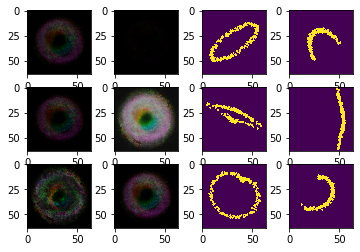

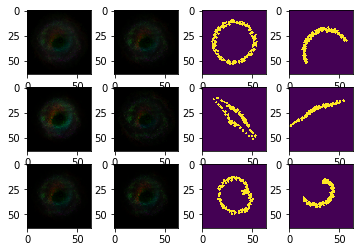

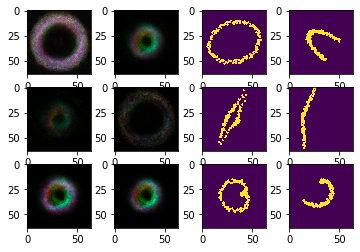

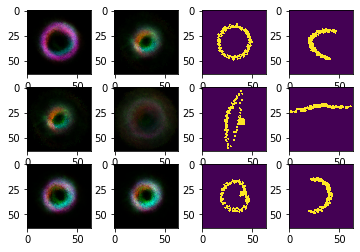

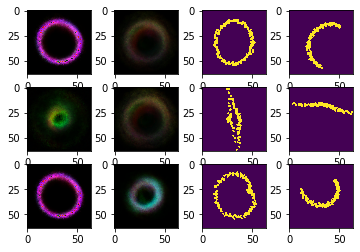

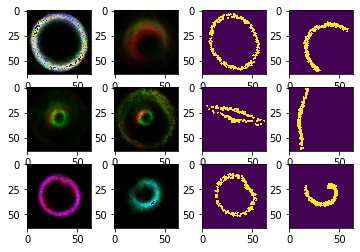

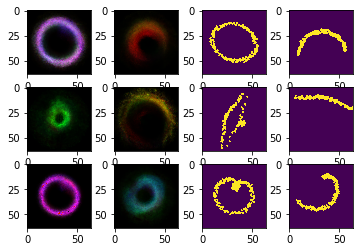

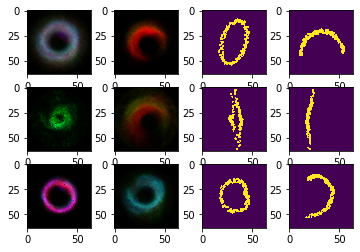

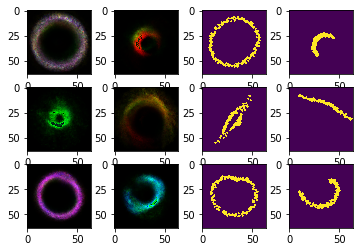

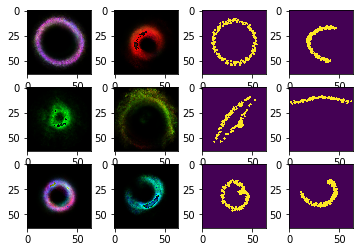

In [17]:
len_test = len(y_train)
plt_epoch = True
epochs = 10# Число эпох
new_matrix = new_matrix.reshape((3600, 64*64*3))
history_list = []
for epoch in range(epochs):
    print('epoch:', epoch + 1)
    history_list.append(model.fit(x = x_train, y = new_matrix,batch_size=128))
    #plt.imshow(x_train[0].reshape(64,64)*255)
    # Выводим, если работаем в IPython, Jupyter или Colab
    #if plt_epoch and epoch > 0 and epoch % 2 == 0:
    fig, ax = plt.subplots(3,4)
    grapics = 0
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]-2):
            idxs = np.flatnonzero(y_train == grapics)
                #print(idxs)
            idxs = np.random.choice(idxs, 1, replace=False)
                #print(idxs)
            imgs_for_test = x_train[idxs]
                #print(imgs_for_test.shape)
            img_pred = model.predict(imgs_for_test)
                #print(imgs_for_test.shape)
            img_pred = PIL.Image.fromarray((img_pred*255*2).reshape(64,64,3).astype('uint8'), 'RGB')
            ax[i][j].imshow(img_pred)
            ax[i][j+2].imshow(imgs_for_test.reshape(64,64))
            grapics+=1

In [55]:
model.save("autoencoder.model")

INFO:tensorflow:Assets written to: autoencoder.model\assets


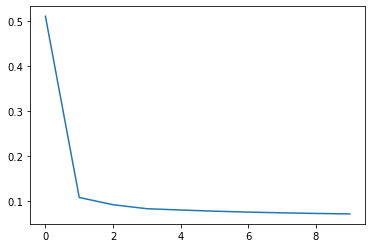

In [22]:
r = []
for x in history_list:
    r.append(x.history['loss'])
fig, ax = plt.subplots(1,1)
ax.plot(np.arange(len(r)), r)

In [ ]:
img = np.random.uniform(0, 1, 16 * 64*64).reshape(16, 64*64)
imgs_pedicted = model.predict(img)
some_plts(imgs_pedicted)

In [56]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64, 64, 64),
                 padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        36928     
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout_31 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense_37 (Dense)            (None, 128)               8388736   
                                                      

In [ ]:
model = tensorflow.keras.Sequential([
                          Dense(100, activation = 'relu'),
                          Dense(50, activation= 'relu'),
                          Dense(50, activation= 'relu'),
                          Dense(1, activation = 'softmax')
])
model.build(input_shape=(200,200,200))
model.summary()

In [ ]:
model = Sequential() # CNN构建
model.add(Conv2D(
input_shape=(200, 200, 4),
# input_shape=(1, Width, Height),
filters=16,
kernel_size=3,
strides=1,
padding='same',
data_format='channels_last',
name='CONV_1'
))
model.summary()

In [ ]:
def one_part(units, x):
    x = Dense(units)(x)
    x = LeakyReLU()(x)
    return Dropout(0.25)(x)

In [ ]:
np.zeros((64*64, 3)).shape

In [ ]:
latent_size = 32 # Размер латентного пространста
inp = Input(shape=(64*64, 3))
x = one_part(2048, inp)
x = one_part(1024, x)
x = one_part(512, x)
x = one_part(256, x)
x = one_part(128, x)
x = one_part(64, x)
x = Dense(latent_size)(x)
encoded = LeakyReLU()(x)
x = one_part(64, encoded)
x = one_part(128, x)
x = one_part(256, x)
x = one_part(512, x)
x = one_part(1024, x)
x = one_part(2048, x)
decoded = Dense(64*64, activation = 'sigmoid')(x)
model = Model(inputs = inp, outputs = decoded)
model.compile('adam', loss = 'binary_crossentropy') # nadam
model.summary()

In [ ]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#2nd convolution layer
model.add(Conv2D(2,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#-------------------------
#3rd convolution layer
model.add(Conv2D(2,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

#4rd convolution layer
model.add(Conv2D(16,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

#-------------------------

model.add(Conv2D(3,(3, 3), padding='same'))
model.add(Activation('sigmoid'))

model.summary()


In [ ]:
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation=relu),
    Dense(10, activation=softmax)
])
model.add()

In [59]:
encoder_input = Input(shape=(64, 64, 1,))
encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(encoder_input)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
#Decoder
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(3, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
model = Model(inputs=encoder_input, outputs=decoder_output)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        640       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 conv2d_28 (Conv2D)          (None, 8, 8, 256)         590080    
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 8, 512)         1180

epoch: 1
1/1 [==============================] - 0s 32ms/step
epoch: 2
1/1 [==============================] - 0s 27ms/step
epoch: 3
1/1 [==============================] - 0s 34ms/step
epoch: 4
1/1 [==============================] - 0s 26ms/step
epoch: 5
1/1 [==============================] - 0s 34ms/step
epoch: 6
1/1 [==============================] - 0s 36ms/step
epoch: 7
1/1 [==============================] - 0s 24ms/step
epoch: 8
1/1 [==============================] - 0s 31ms/step
epoch: 9
1/1 [==============================] - 0s 34ms/step
epoch: 10
1/1 [==============================] - 0s 37ms/step
epoch: 11
1/1 [==============================] - 0s 39ms/step
epoch: 12
1/1 [==============================] - 0s 31ms/step
epoch: 13
1/1 [==============================] - 0s 33ms/step
epoch: 14
1/1 [==============================] - 0s 37ms/step
epoch: 15
1/1 [==============================] - 0s 27ms/step
epoch: 16
1/1 [==============================] - 0s 31ms/step
epoch: 17
1/1 [==

C:\Users\Windows\AppData\Local\Temp/ipykernel_12860/3567678231.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(3,4)


1/1 [==============================] - 0s 34ms/step
epoch: 22
1/1 [==============================] - 0s 26ms/step
epoch: 23
1/1 [==============================] - 0s 26ms/step
epoch: 24
1/1 [==============================] - 0s 30ms/step
epoch: 25
1/1 [==============================] - 0s 25ms/step
epoch: 26
1/1 [==============================] - 0s 29ms/step
epoch: 27
1/1 [==============================] - 0s 30ms/step
epoch: 28
1/1 [==============================] - 0s 38ms/step
epoch: 29
1/1 [==============================] - 0s 44ms/step
epoch: 30
1/1 [==============================] - 0s 39ms/step


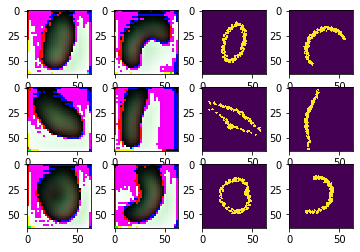

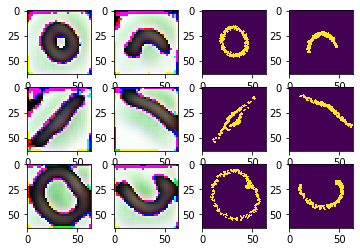

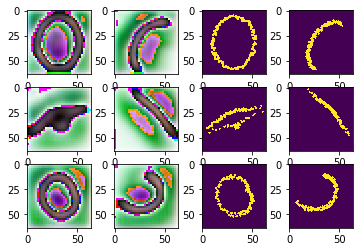

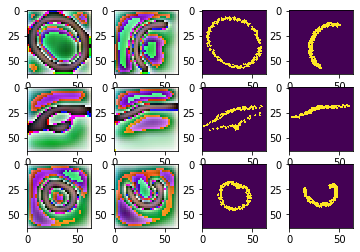

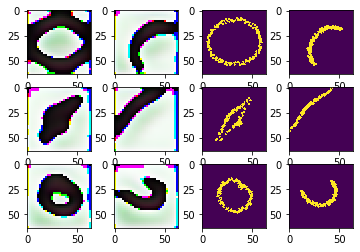

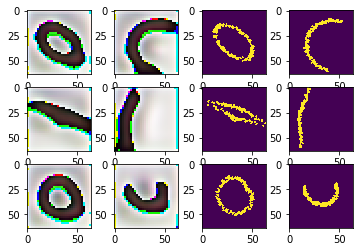

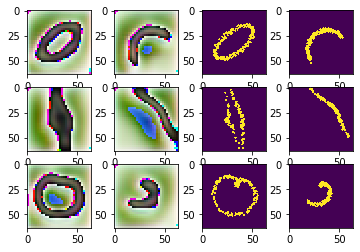

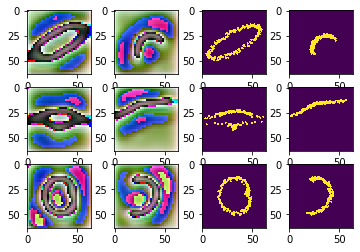

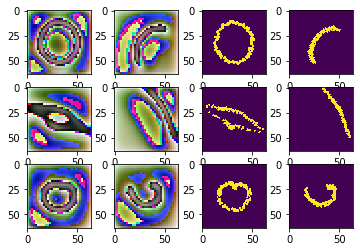

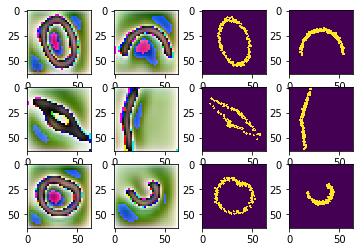

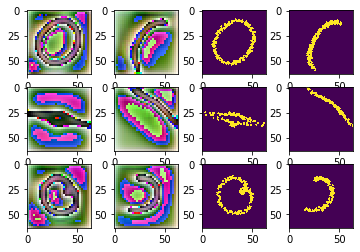

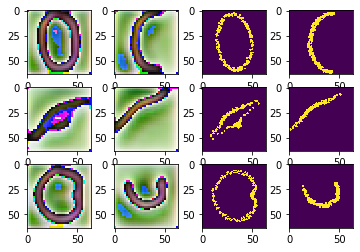

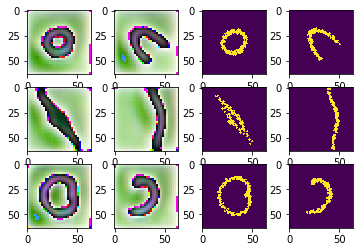

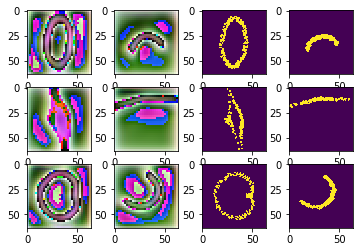

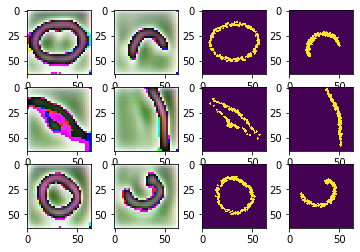

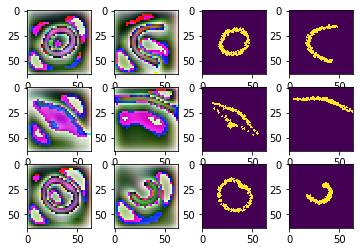

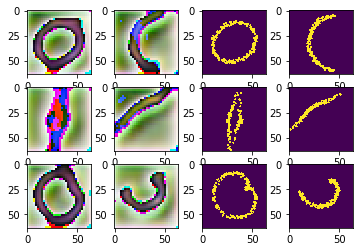

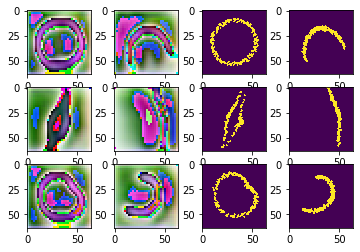

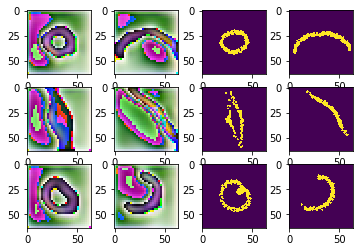

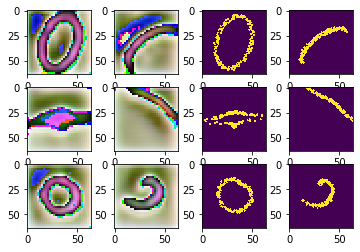

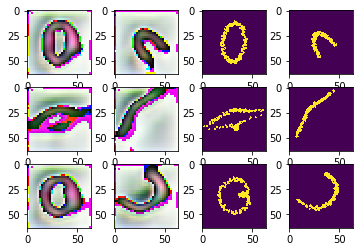

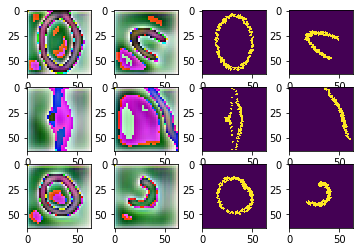

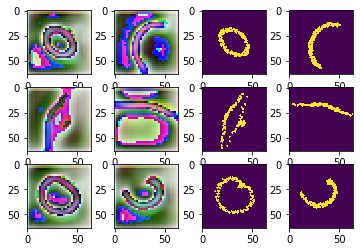

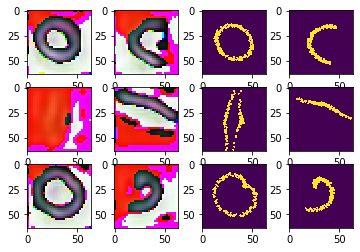

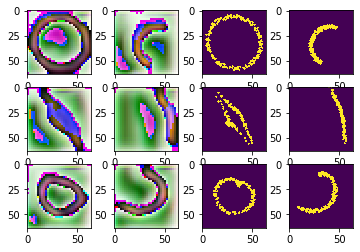

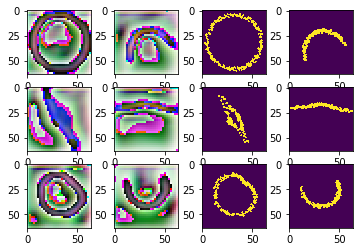

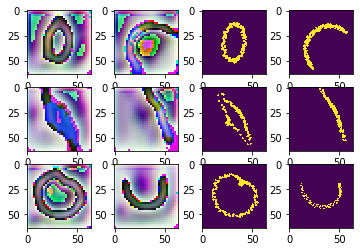

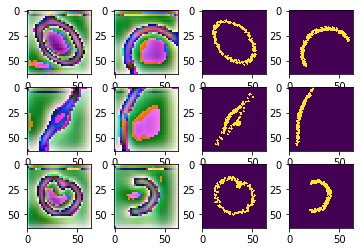

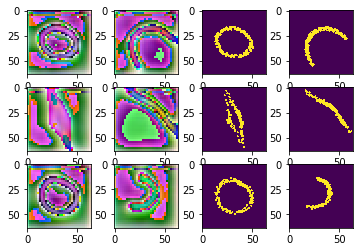

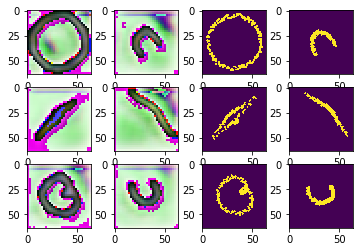

In [61]:
len_test = len(y_train)
plt_epoch = True
epochs = 30# Число эпох
new_matrix = new_matrix.reshape((3600, 64,64, 3))
x_train = x_train.reshape((3600,64,64))
for epoch in range(epochs):
    print('epoch:', epoch + 1)
    model.fit(x = x_train, y = new_matrix,batch_size=128)
    #plt.imshow(x_train[0].reshape(64,64)*255)
    # Выводим, если работаем в IPython, Jupyter или Colab
    #if plt_epoch and epoch > 0 and epoch % 2 == 0:
    fig, ax = plt.subplots(3,4)
    grapics = 0
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]-2):
            idxs = np.flatnonzero(y_train == grapics)
                #print(idxs)
            idxs = np.random.choice(idxs, 1, replace=False)
                #print(idxs)
            imgs_for_test = x_train[idxs]
                #print(imgs_for_test.shape)
            img_pred = model.predict(imgs_for_test)
                #print(imgs_for_test.shape)
            img_pred = PIL.Image.fromarray((img_pred*255*2).reshape(64,64,3).astype('uint8'), 'RGB')
            ax[i][j].imshow(img_pred)
            ax[i][j+2].imshow(imgs_for_test.reshape(64,64))
            grapics+=1

In [57]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, None, None, 8)     80        
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 8)     584       
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 16)    1168      
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 16)    2320      
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 32)    4640      
                                                                 
 conv2d_7 (Conv2D)           (None, None, None, 32)    9248      
                                                                 
 up_sampling2d (UpSampling2D  (None, None, None, 32)  